In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
import yfinance as yf
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
def download_stock_df(stock_name, start_date='2018-01-01', end_date=datetime.today().strftime('%Y-%m-%d'), price='Open'):
    '''
    Download the daily stock price from Yahoo Finance as a dataframe
    
    Input:
    stock_name: string, stock name
    start_date: string, 'YYYY-MM-DD' format of date specifying the date range
    end_date: string, 'YYYY-MM-DD' format of date specifying the date range
    price: 'Open' or 'Close', specifying which stock price is output to the result dataframe
    
    Output:
    df_stock_price: dataframe, with two columns: date, daily_price
        where daily_price is the stock open price by default
    '''
    # Download historical data from Yahoo Finance for AAPL
    data = yf.download(stock_name.upper(), start=start_date, end=end_date)
    # Extract the daily closing prices and reset the index
    df_stock_price = data[[price]].reset_index()
    # Rename the columns to match the desired format
    df_stock_price.columns = ['date', 'daily_price']
    # Ensure daily_price is non-negative
    df_stock_price['daily_price'] = df_stock_price['daily_price'].clip(lower=0)
    return df_stock_price

### Stock to test the support and resistance
* kweb
* yinn
* xbtf

In [9]:
[[5.80], [5.95], [6.10], [6.22], [6.44], [6.58]][:2]

[[5.8], [5.95]]

[*********************100%***********************]  1 of 1 completed


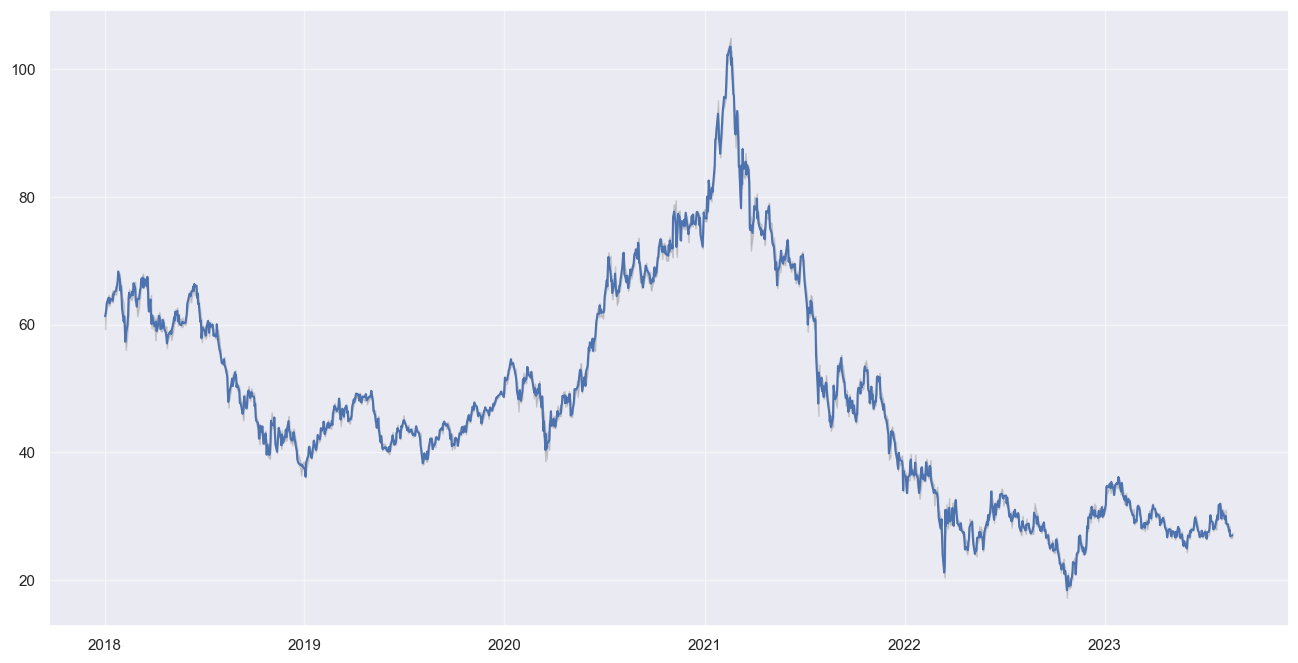

In [7]:
df_kweb = yf.download('kweb'.upper(), start='2018-01-01', end=datetime.today().strftime('%Y-%m-%d'))
df_kweb = df_kweb.reset_index()

plt.figure(figsize=(16, 8))
plt.grid(True, alpha=0.5)

plt.plot(df_kweb['Date'], df_kweb['Close'], label='Daily Close Price')
# plt.plot(df_kweb['Date'], df_kweb['High'], color='green', label='Highest Price')
# plt.plot(df_kweb['Date'], df_kweb['Low'], color='red', label='Lowest Price')

# Shading the region between the highest and lowest prices
plt.fill_between(df_kweb['Date'], df_kweb['Low'], df_kweb['High'], color='gray', alpha=0.3, label='Daily Price Range')
plt.show()

In [4]:
df_kweb.columns = df_kweb.columns.str.lower()
df_kweb.head()


,date,open,high,low,close,adj close,volume
0,2018-01-02,59.279999,61.369999,59.279999,61.320000,55.018784,780100
1,2018-01-03,61.849998,61.930000,61.369999,61.689999,55.350765,604500
2,2018-01-04,62.250000,62.610001,61.919998,62.279999,55.880142,629100
3,2018-01-05,62.610001,63.400002,62.580002,63.389999,56.876076,530300
4,2018-01-08,63.439999,64.250000,63.410000,64.150002,57.557983,945500


In [9]:
df2 = pd.DataFrame()

# Number of previous days to include
num_prev_days = 10

# Loop through the dates in df_kweb
for i, row in df_kweb[df_kweb['date']>='2023-07-01'].iterrows():
    date = row['date']
    price = row['close']
    
    # Create columns for each previous day's price
    for day in range(num_prev_days):
        prev_date = date - pd.Timedelta(days=day + 1)
        prev_price = df_kweb.loc[df_kweb['date'] == prev_date, 'close'].values
        
        # Add the previous day's price to the new dataframe
        col_name = f'price_{-day - 1}day'
        df2.at[i, col_name] = prev_price[0] if len(prev_price) > 0 else None
    
    # Add the current day's price to the new dataframe
    df2.at[i, 'price_0day'] = price

# Merge the date column from df_kweb with df2
df2['date'] = df_kweb[df_kweb['date']>='2023-07-01']['date']

# Reorder the columns to have 'date' first
column_order = ['date'] + [f'price_{-day}day' for day in range(num_prev_days)]
df2 = df2[column_order]

print(df2)

           date  price_0day  price_-1day  price_-2day  price_-3day   
1383 2023-07-03   27.570000          NaN          NaN    26.930000  \
1384 2023-07-05   27.350000          NaN    27.570000          NaN   
1385 2023-07-06   26.490000    27.350000          NaN    27.570000   
1386 2023-07-07   27.480000    26.490000    27.350000          NaN   
1387 2023-07-10   27.559999          NaN          NaN    27.480000   
1388 2023-07-11   27.930000    27.559999          NaN          NaN   
1389 2023-07-12   29.129999    27.930000    27.559999          NaN   
1390 2023-07-13   30.150000    29.129999    27.930000    27.559999   
1391 2023-07-14   29.250000    30.150000    29.129999    27.930000   
1392 2023-07-17   29.080000          NaN          NaN    29.250000   
1393 2023-07-18   27.959999    29.080000          NaN          NaN   
1394 2023-07-19   28.290001    27.959999    29.080000          NaN   
1395 2023-07-20   28.070000    28.290001    27.959999    29.080000   
1396 2023-07-21   28

In [10]:
df2.head()

,date,price_0day,price_-1day,price_-2day,price_-3day,price_-4day,price_-5day,price_-6day,price_-7day,price_-8day,price_-9day
1383,2023-07-03,27.570000,NaN,NaN,26.93,26.83,27.40,27.75,26.889999,NaN,NaN
1384,2023-07-05,27.350000,NaN,27.57,NaN,NaN,26.93,26.83,27.400000,27.75,26.889999
1385,2023-07-06,26.490000,27.35,NaN,27.57,NaN,NaN,26.93,26.830000,27.40,27.750000
1386,2023-07-07,27.480000,26.49,27.35,NaN,27.57,NaN,NaN,26.930000,26.83,27.400000
1387,2023-07-10,27.559999,NaN,NaN,27.48,26.49,27.35,NaN,27.570000,NaN,NaN


In [16]:
!pip install --upgrade mplfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.1 MB/s eta 0:00:00


In [19]:
import datetime
import pytz
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.ticker as mpticker
import pandas
import numpy

from mplfinance.original_flavor import candlestick_ohlc

In [20]:
def plot_stock_data(data):
    fig, ax = plt.subplots()
    ax1 = plt.subplot2grid((5,1), (0,0), rowspan=4)
    ax2 = plt.subplot2grid((5,1), (4,0), sharex=ax1)

    ax1.set_title("{} - {}".format(symbol, start))
    ax1.set_facecolor("#131722")
    ax1.xaxis.set_major_formatter(mpticker.FuncFormatter(mydate))

    candlestick_ohlc(ax1, data.to_numpy(), width=8, colorup='#77d879', colordown='#db3f3f')

    ax2.bar(data['Time'], data['Volume'], width=30)
    ax2.xaxis.set_major_formatter(mpticker.FuncFormatter(mydate))
    fig.subplots_adjust(hspace=0)
    fig.autofmt_xdate()
    return ax1

In [22]:
def mydate(x,pos):
    try:
        return datetime.datetime.fromtimestamp(x, tz=est).strftime(date_format)
    except IndexError:
        return ''

/var/folders/4r/jygz5t7n24724h42lgmbf1hw0000gn/T/ipykernel_85218/1511666669.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((5,1), (0,0), rowspan=4)


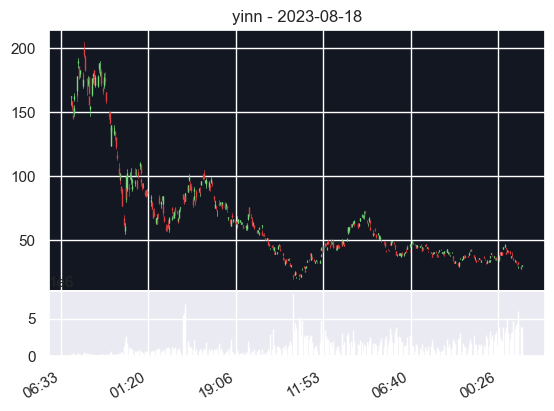

In [34]:
symbol = "yinn"
start = "2023-08-18"
end = "2023-08-19"
est = pytz.timezone('US/Eastern')
date_format = "%H:%M"

ticker = yf.Ticker(symbol)
data = ticker.history(period="1y", interval="1d",start='2022-01-01', end='2023-08-24', prepost=False, actions=False)
# https://github.com/ranaroussi/yfinance/blob/main/yfinance/multi.py#L41

data["Time"] = [d.timestamp() for d in data.index]
data.Time = data.Time.tz_convert(est)
data = data[["Time", "Open", "High", "Low", "Close", "Volume"]]

ax = plot_stock_data(data)

In [36]:
lod, hod = 0, 0

lows = pandas.DataFrame(data=data, index=data.index, columns=["Low"])
highs = pandas.DataFrame(data=data, index=data.index, columns=["High"])

lows

,Low
Date,
2022-01-03 00:00:00-05:00,155.556681
2022-01-04 00:00:00-05:00,151.643313
2022-01-05 00:00:00-05:00,144.990568
2022-01-06 00:00:00-05:00,147.338600
2022-01-07 00:00:00-05:00,158.491730
...,...
2023-08-17 00:00:00-04:00,31.010000
2023-08-18 00:00:00-04:00,28.480000
2023-08-21 00:00:00-04:00,27.730000


In [37]:
highs

,High
Date,
2022-01-03 00:00:00-05:00,162.992100
2022-01-04 00:00:00-05:00,158.687387
2022-01-05 00:00:00-05:00,154.774007
2022-01-06 00:00:00-05:00,155.556683
2022-01-07 00:00:00-05:00,165.144472
...,...
2023-08-17 00:00:00-04:00,32.490002
2023-08-18 00:00:00-04:00,29.459999
2023-08-21 00:00:00-04:00,28.740000
